### Validation
For validating the model, the template code of case DHMA was used [^1]. Case DHMA will show output for 28 days and we ran 8 replications. The output data was analyzed using Multi_run_analysis.ipynb [^2] file, and saved as following data structure:

#### Data structure of saved files (celli): [CD8, macrophage, secreting_agent, fibroblast, uninfected, infected, dead, TGF, collagen, M1, M2, MI, MH, ME, collagen_area_fraction]


[^1]: https://github.com/ashleefv/covid19fibrosis/tree/master/Template%20of%20in%20silico%20experiments
[^2]: https://github.com/ashleefv/covid19fibrosis/tree/master/Analysis

In [1]:
import glob
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random, pickle
import os
from matplotlib.patches import Patch, Rectangle

In [2]:
cell1 = np.array(pickle.load(open('cell1.p', 'rb')))
cell2 = np.array(pickle.load(open('cell2.p', 'rb')))
cell3 = np.array(pickle.load(open('cell3.p', 'rb')))
cell4 = np.array(pickle.load(open('cell4.p', 'rb')))
cell5 = np.array(pickle.load(open('cell5.p', 'rb')))
cell6 = np.array(pickle.load(open('cell6.p', 'rb')))
cell7 = np.array(pickle.load(open('cell7.p', 'rb')))
cell8 = np.array(pickle.load(open('cell8.p', 'rb')))
time = np.array(pickle.load(open('time.p', 'rb')))
CD8 = np.array([cell1[0],cell2[0],cell3[0],cell4[0],cell5[0],cell6[0],cell7[0],cell8[0]])
macrophage = np.array([cell1[1],cell2[1],cell3[1],cell4[1],cell5[1],cell6[1],cell7[1],cell8[1]])
secreteing_agent = np.array([cell1[2],cell2[2],cell3[2],cell4[2],cell5[2],cell6[2],cell7[2],cell8[2]])
fibroblast = np.array([cell1[3],cell2[3],cell3[3],cell4[3],cell5[3],cell6[3],cell7[3],cell8[3]])
TGF = np.array([cell1[7],cell2[7],cell3[7],cell4[7],cell5[7],cell6[7],cell7[7],cell8[7]])
collagen = np.array([cell1[8],cell2[8],cell3[8],cell4[8],cell5[8],cell6[8],cell7[8],cell8[8]])

M1 = np.array([cell1[9],cell2[9],cell3[9],cell4[9],cell5[9],cell6[9],cell7[9],cell8[9]])
M2 = np.array([cell1[10],cell2[10],cell3[10],cell4[10],cell5[10],cell6[10],cell7[10],cell8[10]])
MI = np.array([cell1[11],cell2[11],cell3[11],cell4[11],cell5[11],cell6[11],cell7[11],cell8[11]])
MH = np.array([cell1[12],cell2[12],cell3[12],cell4[12],cell5[12],cell6[12],cell7[12],cell8[12]])
ME = np.array([cell1[13],cell2[13],cell3[13],cell4[13],cell5[13],cell6[13],cell7[13],cell8[13]])
collagen_area = np.array([cell1[14],cell2[14],cell3[14],cell4[14],cell5[14],cell6[14],cell7[14],cell8[14]])
t = np.array([time,time,time,time,time,time,time,time])

### TGF-beta dynamics validation

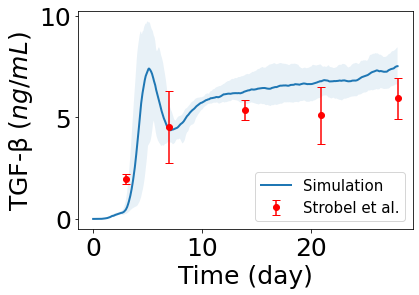

In [3]:
plt.rcParams.update({'font.size': 25})
fifth_percentile_TGF = np.percentile(TGF, 5, axis=0)
ninty_fifth_percentile_TGF = np.percentile(TGF, 95, axis=0)
mean_TGF = np.mean(TGF, axis=0)
plt.plot(time,mean_TGF, label='Simulation',linewidth=2)
plt.fill_between(time, fifth_percentile_TGF, ninty_fifth_percentile_TGF,  alpha = 0.1)

#Strobel data
TGF_days = [3, 7, 14, 21, 28]
TGF_conc = [1.95, 4.52, 5.35, 5.1, 5.94]
TGF_error = [0.25, 1.78, 0.50, 1.4, 1]
plt.errorbar(TGF_days, TGF_conc, yerr=TGF_error, color = 'red', fmt='o',capsize=4, label='Strobel et al.')

plt.xlabel('Time (day)')
plt.ylabel('TGF-β ($ng/mL$)')
plt.legend(loc='lower right', fontsize="15")
plt.savefig("TGF_beta_dynamics_validation.png", dpi = 300, bbox_inches='tight')
plt.show()

### collagen area fraction validation

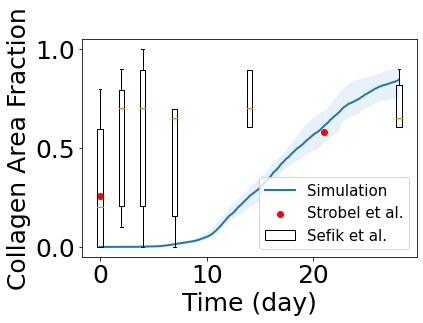

In [4]:
plt.rcParams.update({'font.size': 25})
fig, ax = plt.subplots()

fifth_percentile_collagen_area = np.percentile(collagen_area, 5, axis=0)
ninty_fifth_percentile_collagen_area = np.percentile(collagen_area, 95, axis=0)
mean_collagen_area = np.mean(collagen_area, axis=0)
ax.plot(time,mean_collagen_area, linewidth=2, label='Simulation')
ax.fill_between(time, fifth_percentile_collagen_area, ninty_fifth_percentile_collagen_area, alpha = 0.1)

#Strobel data
ax.scatter([0,21], [0.258, 0.581], c="red", label='Strobel et al.')

# Sefik Data
positions=[0, 2, 4, 7, 14, 28]
boxes = [
    {
        'whislo': 0,    # Bottom whisker position
        'q1'    : 0,    # First quartile (25th percentile)
        'med'   : 0.204,    # Median         (50th percentile)
        'q3'    : 0.596,    # Third quartile (75th percentile)
        'whishi': 0.801,    # Top whisker position
        'fliers': []        # Outliers
    },
    {
        'whislo': 0.101,  # Bottom whisker position
        'q1': 0.208,  # First quartile (25th percentile)
        'med': 0.701,  # Median         (50th percentile)
        'q3': 0.794,  # Third quartile (75th percentile)
        'whishi': 0.90,  # Top whisker position
        'fliers': []  # Outliers
    },
    {
        'whislo': 0,    # Bottom whisker position
        'q1'    : 0.208,    # First quartile (25th percentile)
        'med'   : 0.701,    # Median         (50th percentile)
        'q3'    : 0.896,    # Third quartile (75th percentile)
        'whishi': 1,    # Top whisker position
        'fliers': []        # Outliers
    },
    {
        'whislo': 0,    # Bottom whisker position
        'q1'    : 0.156,    # First quartile (25th percentile)
        'med'   : 0.651,    # Median         (50th percentile)
        'q3'    : 0.696,    # Third quartile (75th percentile)
        'whishi': 0.696,    # Top whisker position
        'fliers': []        # Outliers
    },
    {
        'whislo': 0.607,    # Bottom whisker position
        'q1'    : 0.607,    # First quartile (25th percentile)
        'med'   : 0.701,    # Median         (50th percentile)
        'q3'    : 0.895,    # Third quartile (75th percentile)
        'whishi': 0.895,    # Top whisker position
        'fliers': []        # Outliers
    },
    {
        'whislo': 0.605,    # Bottom whisker position
        'q1'    : 0.605,    # First quartile (25th percentile)
        'med'   : 0.652,    # Median         (50th percentile)
        'q3'    : 0.821,    # Third quartile (75th percentile)
        'whishi': 0.90,    # Top whisker position
        'fliers': []        # Outliers
    },

]
ax.bxp(boxes, positions, showfliers=False, manage_ticks = False)

plt.xlabel('Time (day)')
plt.ylabel('Collagen Area Fraction')
plt.legend()
old_handles, labels = ax.get_legend_handles_labels()
legend_elements = [Patch(facecolor='white', edgecolor='k', label='Sefik et al.')]

plt.legend(handles=old_handles + legend_elements, loc='lower right', fontsize="15")

plt.savefig("collagen_area_fraction.png", dpi = 300, bbox_inches='tight')
plt.show()

### M2 macrophage cell count validation

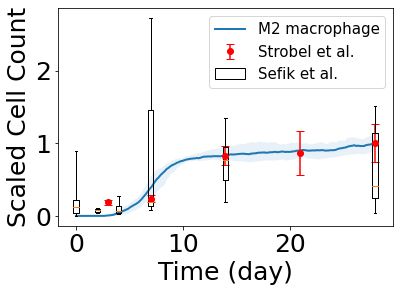

In [5]:
fifth_percentile_M1 = np.percentile(M1, 5, axis=0)
ninty_fifth_percentile_M1 = np.percentile(M1, 95, axis=0)
mean_M1 = np.mean(M1, axis=0)

fifth_percentile_M2 = np.percentile(M2, 5, axis=0)
ninty_fifth_percentile_M2 = np.percentile(M2, 95, axis=0)
mean_M2 = np.mean(M2, axis=0)

fifth_percentile_MI = np.percentile(MI, 5, axis=0)
ninty_fifth_percentile_MI = np.percentile(MI, 95, axis=0)
mean_MI = np.mean(MI, axis=0)

fifth_percentile_MH = np.percentile(MH, 5, axis=0)
ninty_fifth_percentile_MH = np.percentile(MH, 95, axis=0)
mean_MH = np.mean(MH, axis=0)

fifth_percentile_ME = np.percentile(ME, 5, axis=0)
ninty_fifth_percentile_ME = np.percentile(ME, 95, axis=0)
mean_ME = np.mean(ME, axis=0)

plt.rcParams.update({'font.size': 25})

fig1, ax1 = plt.subplots()
ax1.plot(time, mean_M2/np.max(mean_M2), label='M2 macrophage', linewidth=2)
ax1.fill_between(time, fifth_percentile_M2/np.max(mean_M2), ninty_fifth_percentile_M2/np.max(mean_M2), alpha = 0.1)

# Strobel data
monocytes_days = [3, 7, 14, 21, 28]
monocytes_numb = np.array([0.88, 1.1, 3.8, 4, 4.6])
monocyte_error = np.array([0.16, 0.2, 0.6, 1.4, 1.2])
monocyte_error = monocyte_error/np.max(monocytes_numb)
monocytes_numb = monocytes_numb/np.max(monocytes_numb)
ax1.errorbar(monocytes_days, monocytes_numb, yerr=monocyte_error, color = 'red', fmt='o',capsize=4, label='Strobel et al.')

# Sefik Data
day_0 = np.array([0, 0, 0, 2824, 4549, 8470, 8256, 8470, 7686, 15215, 17725, 53125, 60625])
day_2 = np.array([2354, 7058, 6275, 4549])
day_4 = np.array([1725, 2980, 4862, 9725, 18352])
day_7 = np.array([5490, 13333, 185000])
day_14 = np.array([12862, 31529, 35921, 59375, 52500, 68750, 91875])
day_28 = np.array([2923, 13490, 25254, 31529, 93125, 103125])
macrophages_days = [0, 2, 4, 7, 14, 28]

macrophages_numb1 = np.array([np.mean(day_0), np.mean(day_2), np.mean(day_4), np.mean(day_7), np.mean(day_14), np.mean(day_28)])
day_0 = day_0/np.max(macrophages_numb1)
day_2 = day_2/np.max(macrophages_numb1)
day_4 = day_4/np.max(macrophages_numb1)
day_7 = day_7/np.max(macrophages_numb1)
day_14 = day_14/np.max(macrophages_numb1)
day_28 = day_28/np.max(macrophages_numb1)

boxes_M2 = [
    {
        'whislo': np.min(day_0),    # Bottom whisker position
        'q1'    : np.percentile(day_0, 25, axis=0),    # First quartile (25th percentile)
        'med'   : np.percentile(day_0, 50, axis=0),    # Median         (50th percentile)
        'q3'    : np.percentile(day_0, 75, axis=0),    # Third quartile (75th percentile)
        'whishi': np.max(day_0),    # Top whisker position
        'fliers': []        # Outliers
    },
    {
        'whislo': np.min(day_2),  # Bottom whisker position
        'q1': np.percentile(day_2, 25, axis=0),  # First quartile (25th percentile)
        'med': np.percentile(day_2, 50, axis=0),  # Median         (50th percentile)
        'q3': np.percentile(day_2, 75, axis=0),  # Third quartile (75th percentile)
        'whishi': np.max(day_2),  # Top whisker position
        'fliers': []  # Outliers
    },
    {
        'whislo': np.min(day_4),    # Bottom whisker position
        'q1'    : np.percentile(day_4, 25, axis=0),    # First quartile (25th percentile)
        'med'   : np.percentile(day_4, 50, axis=0),    # Median         (50th percentile)
        'q3'    : np.percentile(day_4, 75, axis=0),    # Third quartile (75th percentile)
        'whishi': np.max(day_4),    # Top whisker position
        'fliers': []        # Outliers
    },
    {
        'whislo': np.min(day_7),    # Bottom whisker position
        'q1'    : np.percentile(day_7, 25, axis=0),    # First quartile (25th percentile)
        'med'   : np.percentile(day_7, 50, axis=0),    # Median         (50th percentile)
        'q3'    : np.percentile(day_7, 75, axis=0),    # Third quartile (75th percentile)
        'whishi': np.max(day_7),    # Top whisker position
        'fliers': []        # Outliers
    },
    {
        'whislo': np.min(day_14),    # Bottom whisker position
        'q1'    : np.percentile(day_14, 25, axis=0),    # First quartile (25th percentile)
        'med'   : np.percentile(day_14, 50, axis=0),    # Median         (50th percentile)
        'q3'    : np.percentile(day_14, 75, axis=0),    # Third quartile (75th percentile)
        'whishi': np.max(day_14),    # Top whisker position
        'fliers': []        # Outliers
    },
    {
        'whislo': np.min(day_28),    # Bottom whisker position
        'q1'    : np.percentile(day_28, 25, axis=0),    # First quartile (25th percentile)
        'med'   : np.percentile(day_28, 50, axis=0),    # Median         (50th percentile)
        'q3'    : np.percentile(day_28, 75, axis=0),    # Third quartile (75th percentile)
        'whishi': np.max(day_28),    # Top whisker position
        'fliers': []        # Outliers
    },

]
ax1.bxp(boxes_M2, macrophages_days, showfliers=False, manage_ticks = False)



plt.xlabel('Time (day)')
plt.ylabel('Scaled Cell Count')
plt.legend()
old_handles, labels = ax1.get_legend_handles_labels()
legend_elements = [Patch(facecolor='white', edgecolor='k', label='Sefik et al.')]

plt.legend(handles=old_handles + legend_elements, loc='upper right', fontsize="15")
plt.savefig("M2_cell_validation.png", dpi = 300, bbox_inches='tight')
plt.show()